In [1]:
import networkx as nx
import pandas as pd
import numpy as np

# community detection
import community as community_louvain

# convert string list to actual list, for explode
from ast import literal_eval

# bipartite projection
from networkx.algorithms import bipartite

In [2]:
# for visualization
from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 
from scipy.sparse import csr_matrix

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):

    adjacency = nx.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr')
    adjacency = csr_matrix(adjacency) # fix to weird sknetwork-csr issue; comment out to troubleshoot
    
    names = np.array(list(G.nodes))
    
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = np.array(names)
    
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency)

    if show_names:
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
    
    else:
        
        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width)
    
    return SVG(image)

# Random Network Graph

https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.random_regular_graph.html

Hints:
- All nodes have a similar number of edges
- There are no hubs in a random network as all nodes have a similar number of edges

As my draw_graph function includes pagerank for node coloring, you can tell that there are no hubs in these networks as all nodes are the same color. All nodes have the same pagerank score, and there are no hubs.

In [102]:
def show_graph_context(G):

    print(G)
    print()
    print('Density: {}'.format(nx.density(G)))
    print('Diameter: {}'.format(nx.diameter(G)))
    print('Average Clustering: {}'.format(nx.average_clustering(G)))

In [109]:
def show_degree_distribution(G):

    degrees = [degree for node, degree in G.degree()]

    return pd.Series(degrees).plot.hist()

Graph with 10 nodes and 25 edges

Density: 0.5555555555555556
Diameter: 2
Average Clustering: 0.41999999999999993


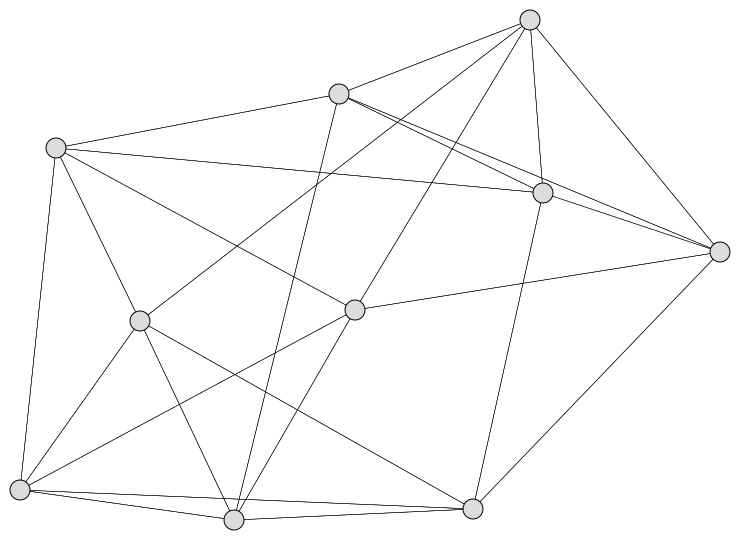

In [110]:
nodes = 10
degrees = 5

G = nx.random_regular_graph(n=nodes, d=degrees)

show_graph_context(G)

draw_graph(G, show_names=False, node_size=10)

<Axes: ylabel='Frequency'>

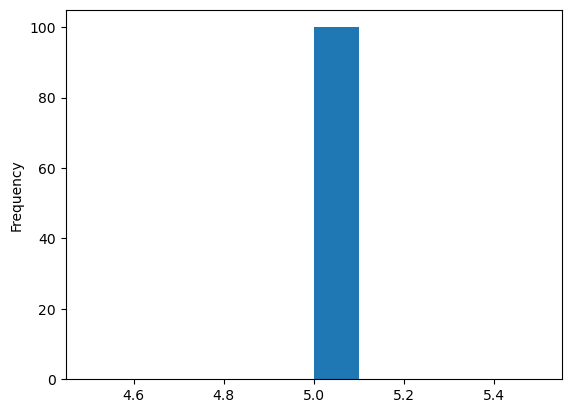

In [116]:
show_degree_distribution(G)

Graph with 100 nodes and 250 edges

Density: 0.050505050505050504
Diameter: 5
Average Clustering: 0.033000000000000015


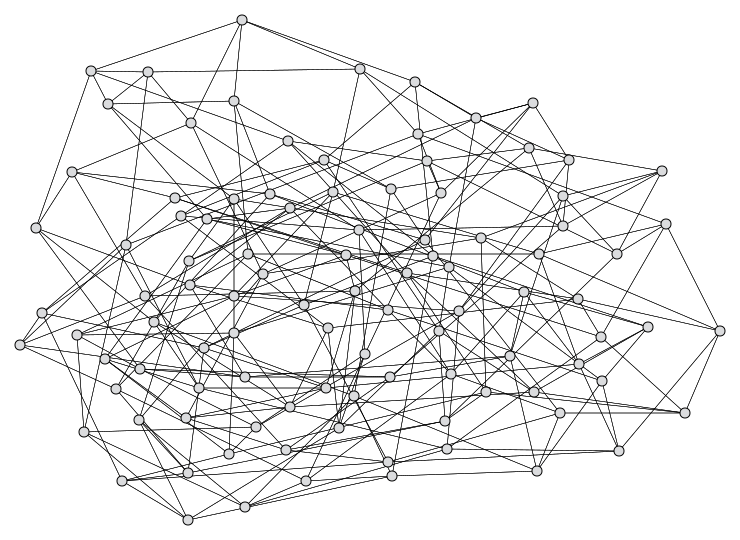

In [117]:
nodes = 100
degrees = 5

G = nx.random_regular_graph(n=nodes, d=degrees)

show_graph_context(G)

draw_graph(G, show_names=False, node_size=5)

<Axes: ylabel='Frequency'>

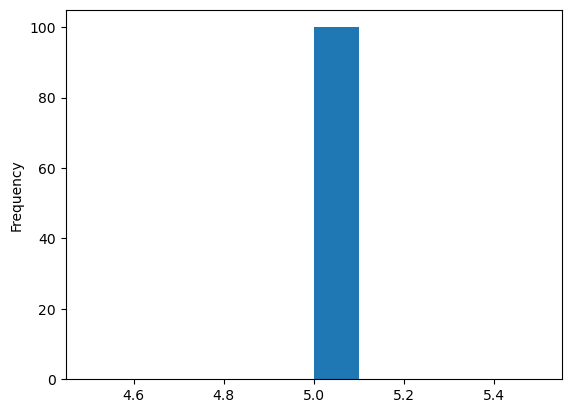

In [118]:
show_degree_distribution(G)

Graph with 1000 nodes and 2500 edges

Density: 0.005005005005005005
Diameter: 7
Average Clustering: 0.0024000000000000007


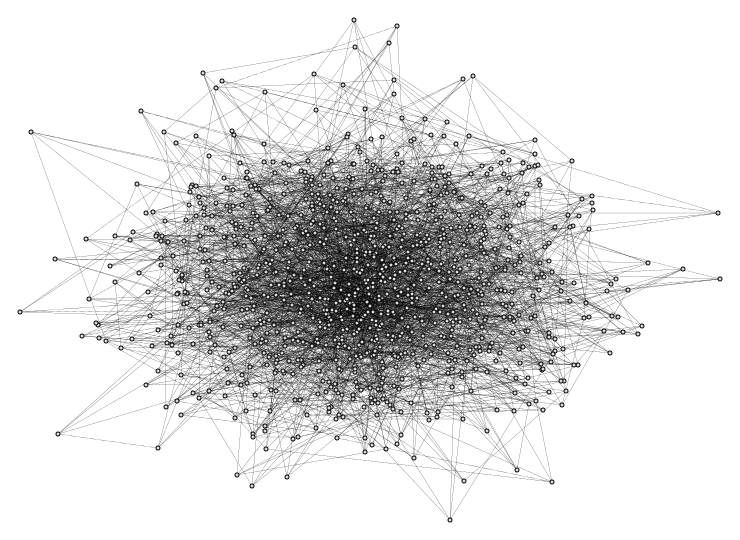

In [119]:
nodes = 1000
degrees = 5

G = nx.random_regular_graph(n=nodes, d=degrees)

show_graph_context(G)

draw_graph(G, show_names=False, node_size=2, edge_width=0.1)

<Axes: ylabel='Frequency'>

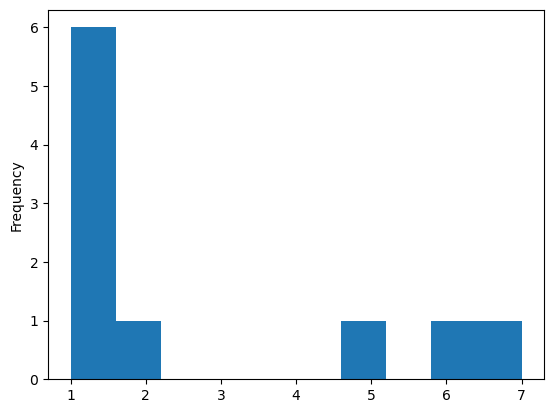

In [122]:
show_degree_distribution(G)

# Scale-Free Network Graph

https://networkx.org/documentation/stable/reference/generated/networkx.generators.directed.scale_free_graph.html

Hints:
- Most nodes have very few links
- Hubs exist

Graph with 10 nodes and 11 edges

Density: 0.24444444444444444
Diameter: 4
Average Clustering: 0.12000000000000002


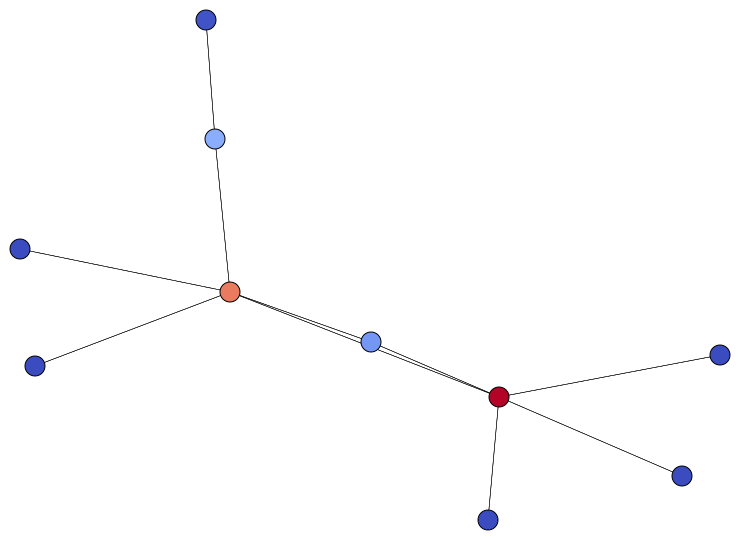

In [123]:
nodes = 10

G = nx.scale_free_graph(n=nodes)
G = nx.Graph(G)

show_graph_context(G)

draw_graph(G, show_names=False, node_size=10)

<Axes: ylabel='Frequency'>

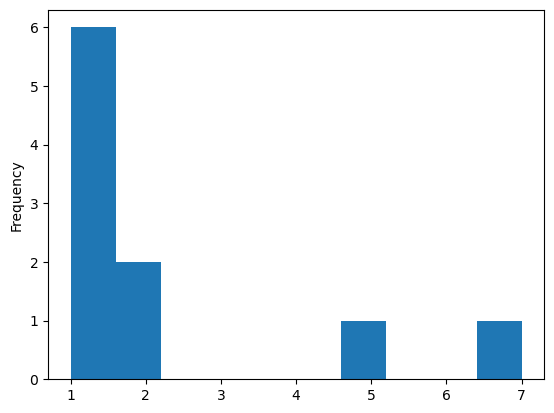

In [124]:
show_degree_distribution(G)

Graph with 100 nodes and 155 edges

Density: 0.031313131313131314
Diameter: 5
Average Clustering: 0.2594210900762228


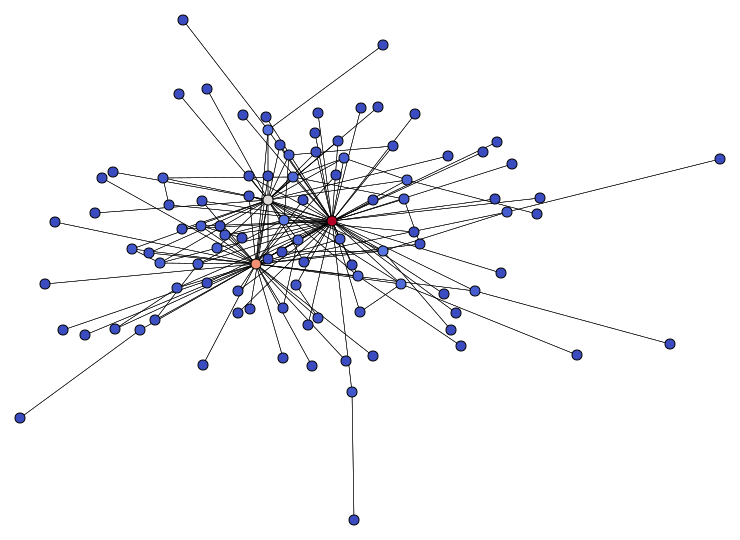

In [126]:
nodes = 100

G = nx.scale_free_graph(n=nodes)
G = nx.Graph(G)

show_graph_context(G)

draw_graph(G, show_names=False, node_size=5)

<Axes: ylabel='Frequency'>

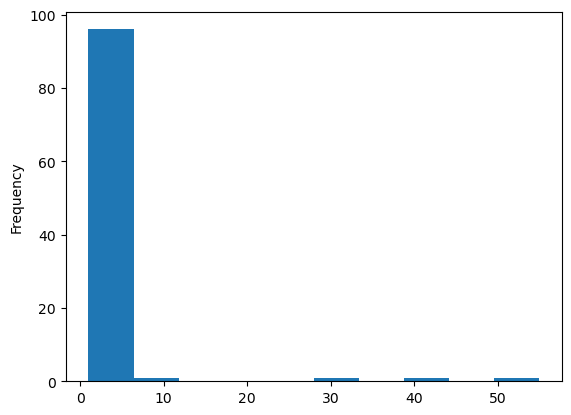

In [127]:
show_degree_distribution(G)

Graph with 1000 nodes and 1687 edges

Density: 0.003377377377377377
Diameter: 7
Average Clustering: 0.17551677120059422


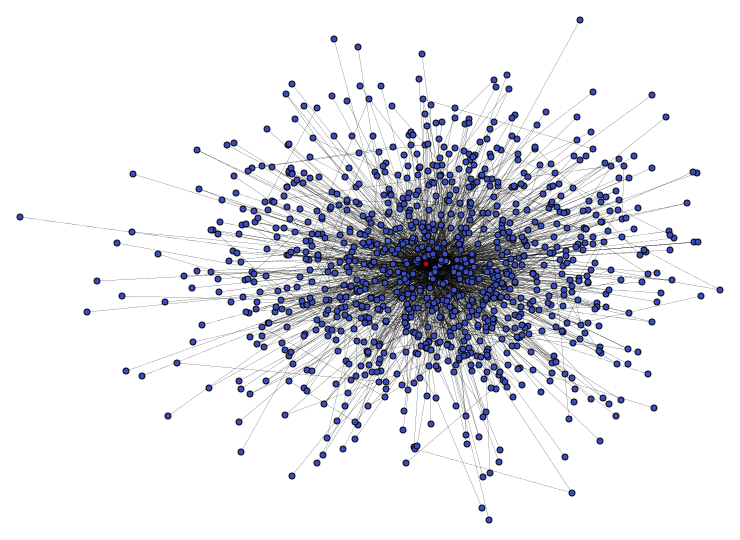

In [128]:
nodes = 1000

G = nx.scale_free_graph(n=nodes)
G = nx.Graph(G)

show_graph_context(G)

draw_graph(G, show_names=False, node_size=3, edge_width=0.1)

<Axes: ylabel='Frequency'>

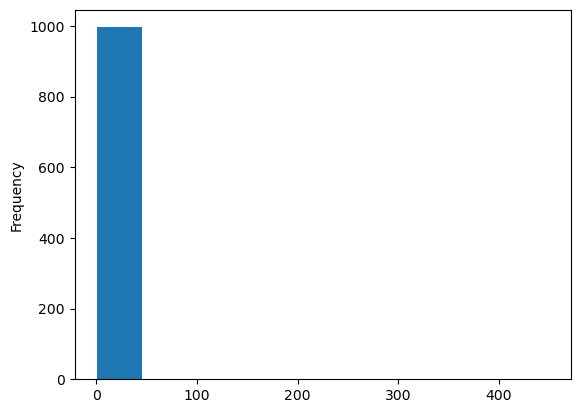

In [129]:
show_degree_distribution(G)

# Wikipedia Network

Graph with 8985 nodes and 12962 edges
Graph with 213 nodes and 782 edges

Density: 0.034635485871202056
Diameter: 4
Average Clustering: 0.3681339077931759


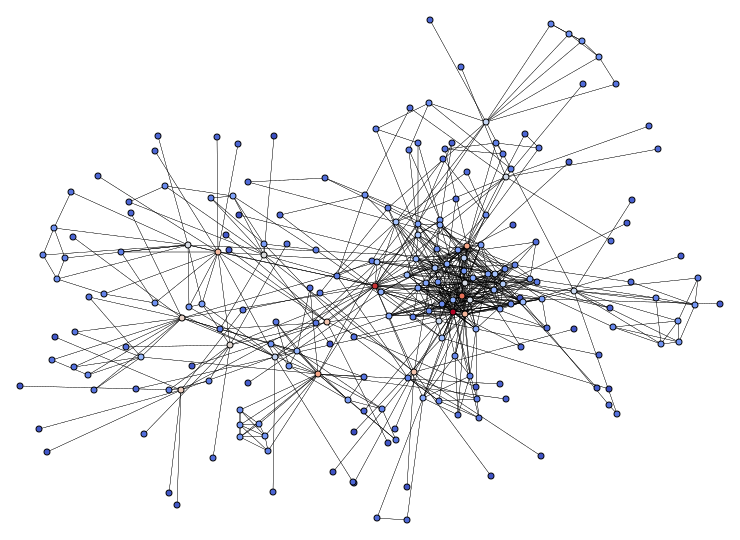

In [130]:
data = 'data/conspiracy_theory_edgelist.csv'

df = pd.read_csv(data)

G = nx.from_pandas_edgelist(df, create_using=nx.Graph)
print(G)

G = nx.ego_graph(G, 'QAnon', radius=2, center=True)

show_graph_context(G)

draw_graph(G, show_names=False, node_size=3, font_size=11, edge_width=0.3)

<Axes: ylabel='Frequency'>

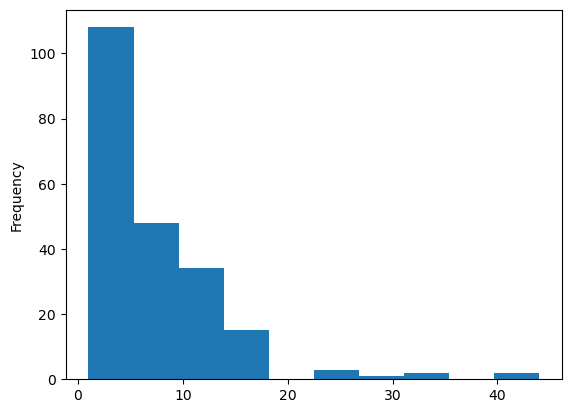

In [131]:
show_degree_distribution(G)

# Arxiv Network

Graph with 66696 nodes and 306509 edges
Graph with 104 nodes and 323 edges

Density: 0.06030619865571322
Diameter: 2
Average Clustering: 0.8167900780153801


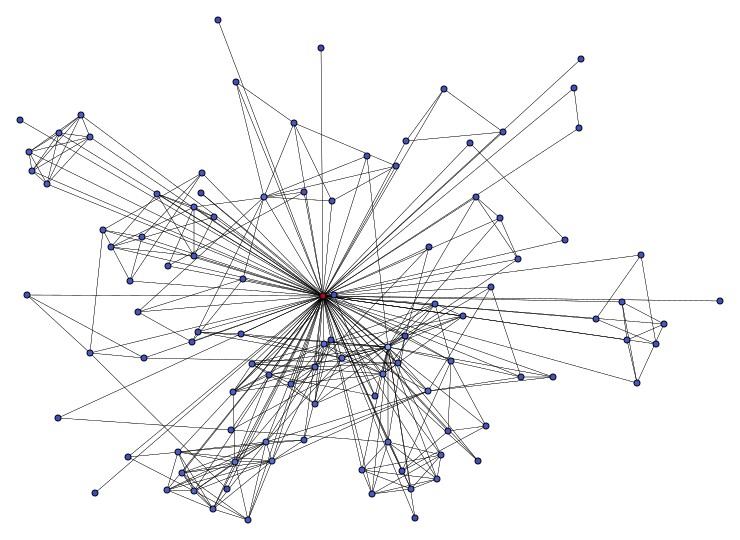

In [132]:
data = 'data/arxiv_network_science_data.csv'

df = pd.read_csv(data)
df = df[['authors', 'title']]

df['authors'] = df['authors'].apply(literal_eval)
df = df.explode('authors')

B = nx.from_pandas_edgelist(df, source='authors', target='title')
G = bipartite.projected_graph(B, df['authors'])

print(G)

G = nx.ego_graph(G, 'Mason A. Porter')

show_graph_context(G)

draw_graph(G, show_names=False, node_size=3, font_size=11, edge_width=0.3)

<Axes: ylabel='Frequency'>

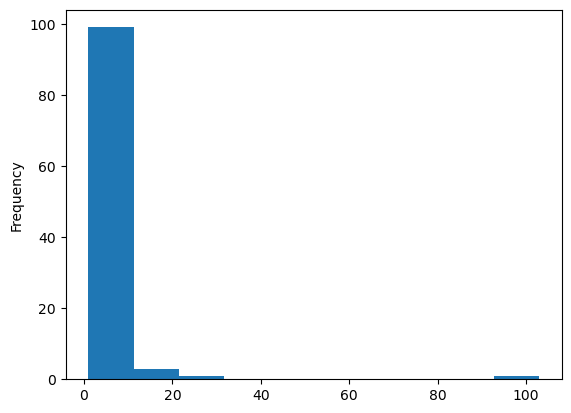

In [133]:
show_degree_distribution(G)

# Spotify Network

Graph with 87 nodes and 88 edges

Density: 0.023523122159850307
Diameter: 6
Average Clustering: 0.0


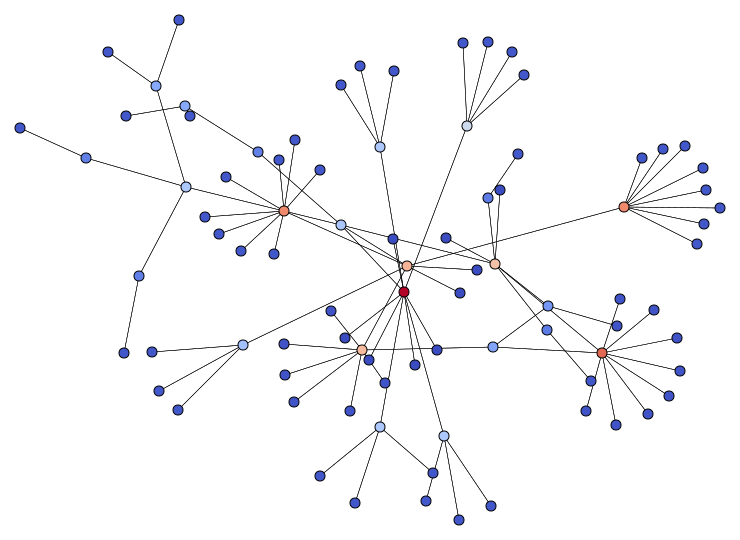

In [134]:
data = 'data/spotify_bbking_edgelist.csv'

df = pd.read_csv(data)
G = nx.from_pandas_edgelist(df)

show_graph_context(G)

draw_graph(G, show_names=False, node_size=5, font_size=11)

<Axes: ylabel='Frequency'>

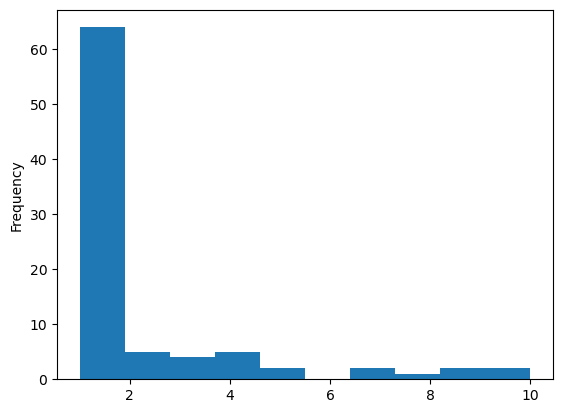

In [135]:
show_degree_distribution(G)